# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [4]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [ ]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')
print (type(xs[['d', 'f', 'h']]), '\n')

In [ ]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

In [ ]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [ ]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1]
print(s)

### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas has a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [ ]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2022,11,30,10,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 30 2022'
# or alternatively
date = '30/11/2022 10:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. 

In [ ]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 19
tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts.value)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



A standard series can be created and (range of) elements can be used as indexes

In [ ]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2022-11-30':'2022-12-01'], '\n') # Note - includes end time


`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [ ]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [5]:
entries=10
dates=pd.date_range('11/30/2022 10:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2022-11-30 10:45:00,0.651811,0.676088,-0.696847,-0.137052
2022-11-30 11:45:00,-0.914051,-0.354280,0.963879,-0.000521
2022-11-30 12:45:00,-0.579611,-0.368374,0.110235,0.106241
2022-11-30 13:45:00,0.160317,0.943957,-2.131690,-0.985294
2022-11-30 14:45:00,0.722298,-1.241749,0.539548,0.294308
2022-11-30 15:45:00,0.125407,0.273689,0.469319,-0.269049
2022-11-30 16:45:00,-0.695347,-1.012851,1.347443,0.535333
2022-11-30 17:45:00,-1.335070,0.230078,-0.620998,-1.461976
2022-11-30 18:45:00,-0.004254,0.450756,-1.207275,-0.335497
2022-11-30 19:45:00,0.353063,1.274526,-0.032613,-0.685857


or by means of a dictionary:


In [1]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
df2

# check what happens if D and E had different lenghts 

NameError: name 'pd' is not defined

### Viewing Data

In [ ]:
df.head(2)

In [ ]:
df.tail(4)

In [ ]:
df.index

In [ ]:
df.columns

In [ ]:
df.values

In [ ]:
df.describe()

In [ ]:
df.T

In [ ]:
df.sort_index(axis=0,ascending=True)

In [ ]:
df.sort_values(by="C")

## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [6]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2022-11-30 10:45:00    0.651811
2022-11-30 11:45:00   -0.914051
2022-11-30 12:45:00   -0.579611
2022-11-30 13:45:00    0.160317
2022-11-30 14:45:00    0.722298
2022-11-30 15:45:00    0.125407
2022-11-30 16:45:00   -0.695347
2022-11-30 17:45:00   -1.335070
2022-11-30 18:45:00   -0.004254
2022-11-30 19:45:00    0.353063
Freq: H, Name: A, dtype: float64 

2022-11-30 10:45:00    0.651811
2022-11-30 11:45:00   -0.914051
2022-11-30 12:45:00   -0.579611
2022-11-30 13:45:00    0.160317
2022-11-30 14:45:00    0.722298
2022-11-30 15:45:00    0.125407
2022-11-30 16:45:00   -0.695347
2022-11-30 17:45:00   -1.335070
2022-11-30 18:45:00   -0.004254
2022-11-30 19:45:00    0.353063
Freq: H, Name: A, dtype: float64


In [52]:
# selecting rows by counting
#print (df[0:3])
print(df[df.index[0]: df.index[3]])

# or by index
print (df["2022-11-30 10:45:00":"2022-11-30 12:45:00"])

                            A         B         C  D         E  E prime  \
2022-11-30 10:45:00  0.000000  0.676088 -0.696847  5  1.000000        0   
2022-11-30 11:45:00 -0.914051 -0.354280  0.963879  5  0.999962        2   
2022-11-30 12:45:00 -0.579611 -0.368374  0.110235  5  0.999848        4   
2022-11-30 13:45:00  0.160317  0.943957 -2.131690  5  0.999657        6   

                       cosine  
2022-11-30 10:45:00  1.000000  
2022-11-30 11:45:00  0.999962  
2022-11-30 12:45:00  0.999848  
2022-11-30 13:45:00  0.999657  
                            A         B         C  D         E  E prime  \
2022-11-30 10:45:00  0.000000  0.676088 -0.696847  5  1.000000        0   
2022-11-30 11:45:00 -0.914051 -0.354280  0.963879  5  0.999962        2   
2022-11-30 12:45:00 -0.579611 -0.368374  0.110235  5  0.999848        4   

                       cosine  
2022-11-30 10:45:00  1.000000  
2022-11-30 11:45:00  0.999962  
2022-11-30 12:45:00  0.999848  


### Selection by label

In [10]:
# getting a cross section (part of the DataFrame) using a label
df.loc['2022-11-30 10:45:00']

A    0.651811
B    0.676088
C   -0.696847
D   -0.137052
Name: 2022-11-30 10:45:00, dtype: float64

In [24]:
# selecting on a multi-axis by label:
df.loc[dates[1]:dates[3]]
#df[dates[1]:dates[3]]
#a=df.loc[:,['A','B']]

,A,B,C,D
2022-11-30 11:45:00,-0.914051,-0.354280,0.963879,-0.000521
2022-11-30 12:45:00,-0.579611,-0.368374,0.110235,0.106241
2022-11-30 13:45:00,0.160317,0.943957,-2.131690,-0.985294


In [ ]:
# showing label slicing, both endpoints are included:
df.loc['2022-11-30 14:45:00':'2022-11-30 16:45:00',['A','B']]

In [ ]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

### Selecting by position

In [25]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A    0.160317
B    0.943957
C   -2.131690
D   -0.985294
Name: 2022-11-30 13:45:00, dtype: float64 

                            A         B
2022-11-30 13:45:00  0.160317  0.943957
2022-11-30 14:45:00  0.722298 -1.241749


In [71]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.zloc[[1,2,4],[0,2]]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


In [ ]:
# selecting an individual element by position
df.iloc[1,1]
df.iat[1,1]


### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [ ]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

In [26]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2022-11-30 10:45:00,0.651811,0.676088,NaN,NaN
2022-11-30 11:45:00,NaN,NaN,0.963879,NaN
2022-11-30 12:45:00,NaN,NaN,0.110235,0.106241
2022-11-30 13:45:00,0.160317,0.943957,NaN,NaN
2022-11-30 14:45:00,0.722298,NaN,0.539548,0.294308
2022-11-30 15:45:00,0.125407,0.273689,0.469319,NaN
2022-11-30 16:45:00,NaN,NaN,1.347443,0.535333
2022-11-30 17:45:00,NaN,0.230078,NaN,NaN
2022-11-30 18:45:00,NaN,0.450756,NaN,NaN
2022-11-30 19:45:00,0.353063,1.274526,NaN,NaN


### Setting

Combination of selection and setting of values

In [32]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)
df

,A,B,C,D,E,E prime
2022-11-30 10:45:00,0.000000,0.676088,-0.696847,5,0.0,0
2022-11-30 11:45:00,-0.914051,-0.354280,0.963879,5,0.5,2
2022-11-30 12:45:00,-0.579611,-0.368374,0.110235,5,1.0,4
2022-11-30 13:45:00,0.160317,0.943957,-2.131690,5,1.5,6
2022-11-30 14:45:00,0.722298,-1.241749,0.539548,5,2.0,8
2022-11-30 15:45:00,0.125407,0.273689,0.469319,5,2.5,10
2022-11-30 16:45:00,-0.695347,-1.012851,1.347443,5,3.0,12
2022-11-30 17:45:00,-1.335070,0.230078,-0.620998,5,3.5,14
2022-11-30 18:45:00,-0.004254,0.450756,-1.207275,5,4.0,16
2022-11-30 19:45:00,0.353063,1.274526,-0.032613,5,4.5,18


In [35]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df["E"] = df["E"].apply(dcos)
df

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,0.676088,-0.696847,5,1.000000,0,1.000000
2022-11-30 11:45:00,-0.914051,-0.354280,0.963879,5,0.999962,2,0.999962
2022-11-30 12:45:00,-0.579611,-0.368374,0.110235,5,0.999848,4,0.999848
2022-11-30 13:45:00,0.160317,0.943957,-2.131690,5,0.999657,6,0.999657
2022-11-30 14:45:00,0.722298,-1.241749,0.539548,5,0.999391,8,0.999391
2022-11-30 15:45:00,0.125407,0.273689,0.469319,5,0.999048,10,0.999048
2022-11-30 16:45:00,-0.695347,-1.012851,1.347443,5,0.998630,12,0.998630
2022-11-30 17:45:00,-1.335070,0.230078,-0.620998,5,0.998135,14,0.998135
2022-11-30 18:45:00,-0.004254,0.450756,-1.207275,5,0.997564,16,0.997564
2022-11-30 19:45:00,0.353063,1.274526,-0.032613,5,0.996917,18,0.996917


In [36]:
# another example of global setting
df2=df.copy()

df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,-0.676088,-0.696847,-5,-1.000000,0,-1.000000
2022-11-30 11:45:00,-0.914051,-0.354280,-0.963879,-5,-0.999962,-2,-0.999962
2022-11-30 12:45:00,-0.579611,-0.368374,-0.110235,-5,-0.999848,-4,-0.999848
2022-11-30 13:45:00,-0.160317,-0.943957,-2.131690,-5,-0.999657,-6,-0.999657
2022-11-30 14:45:00,-0.722298,-1.241749,-0.539548,-5,-0.999391,-8,-0.999391
2022-11-30 15:45:00,-0.125407,-0.273689,-0.469319,-5,-0.999048,-10,-0.999048
2022-11-30 16:45:00,-0.695347,-1.012851,-1.347443,-5,-0.998630,-12,-0.998630
2022-11-30 17:45:00,-1.335070,-0.230078,-0.620998,-5,-0.998135,-14,-0.998135
2022-11-30 18:45:00,-0.004254,-0.450756,-1.207275,-5,-0.997564,-16,-0.997564
2022-11-30 19:45:00,-0.353063,-1.274526,-0.032613,-5,-0.996917,-18,-0.996917


In [62]:
print(df.loc[1:2])
df

TypeError: cannot do slice indexing on DatetimeIndex with these indexers [1] of type int

### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [46]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
new_df=df.drop(columns=['E prime'])
new_df

,A,B,C,D,E,cosine
2022-11-30 10:45:00,0.000000,0.676088,-0.696847,5,1.000000,1.000000
2022-11-30 11:45:00,-0.914051,-0.354280,0.963879,5,0.999962,0.999962
2022-11-30 12:45:00,-0.579611,-0.368374,0.110235,5,0.999848,0.999848
2022-11-30 13:45:00,0.160317,0.943957,-2.131690,5,0.999657,0.999657
2022-11-30 14:45:00,0.722298,-1.241749,0.539548,5,0.999391,0.999391
2022-11-30 15:45:00,0.125407,0.273689,0.469319,5,0.999048,0.999048
2022-11-30 16:45:00,-0.695347,-1.012851,1.347443,5,0.998630,0.998630
2022-11-30 17:45:00,-1.335070,0.230078,-0.620998,5,0.998135,0.998135
2022-11-30 18:45:00,-0.004254,0.450756,-1.207275,5,0.997564,0.997564
2022-11-30 19:45:00,0.353063,1.274526,-0.032613,5,0.996917,0.996917


In [56]:
# Dropping by raws
# safe and always working
df.drop(df.index[1:4])

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,0.676088,-0.696847,5,1.000000,0,1.000000
2022-11-30 14:45:00,0.722298,-1.241749,0.539548,5,0.999391,8,0.999391
2022-11-30 15:45:00,0.125407,0.273689,0.469319,5,0.999048,10,0.999048
2022-11-30 16:45:00,-0.695347,-1.012851,1.347443,5,0.998630,12,0.998630
2022-11-30 17:45:00,-1.335070,0.230078,-0.620998,5,0.998135,14,0.998135
2022-11-30 18:45:00,-0.004254,0.450756,-1.207275,5,0.997564,16,0.997564
2022-11-30 19:45:00,0.353063,1.274526,-0.032613,5,0.996917,18,0.996917


In [ ]:
df

In [43]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2022-11-30 18:45:00"))

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,0.676088,-0.696847,5,1.000000,0,1.000000
2022-11-30 11:45:00,-0.914051,-0.354280,0.963879,5,0.999962,2,0.999962
2022-11-30 12:45:00,-0.579611,-0.368374,0.110235,5,0.999848,4,0.999848
2022-11-30 13:45:00,0.160317,0.943957,-2.131690,5,0.999657,6,0.999657
2022-11-30 14:45:00,0.722298,-1.241749,0.539548,5,0.999391,8,0.999391
2022-11-30 15:45:00,0.125407,0.273689,0.469319,5,0.999048,10,0.999048
2022-11-30 16:45:00,-0.695347,-1.012851,1.347443,5,0.998630,12,0.998630
2022-11-30 17:45:00,-1.335070,0.230078,-0.620998,5,0.998135,14,0.998135
2022-11-30 19:45:00,0.353063,1.274526,-0.032613,5,0.996917,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [57]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,NaN,0.676088,NaN,5,1.000000,NaN,1.000000
2022-11-30 11:45:00,NaN,NaN,0.963879,5,0.999962,2.0,0.999962
2022-11-30 12:45:00,NaN,NaN,0.110235,5,0.999848,4.0,0.999848
2022-11-30 13:45:00,0.160317,0.943957,NaN,5,0.999657,6.0,0.999657
2022-11-30 14:45:00,0.722298,NaN,0.539548,5,0.999391,8.0,0.999391
2022-11-30 15:45:00,0.125407,0.273689,0.469319,5,0.999048,10.0,0.999048
2022-11-30 16:45:00,NaN,NaN,1.347443,5,0.998630,12.0,0.998630
2022-11-30 17:45:00,NaN,0.230078,NaN,5,0.998135,14.0,0.998135
2022-11-30 18:45:00,NaN,0.450756,NaN,5,0.997564,16.0,0.997564
2022-11-30 19:45:00,0.353063,1.274526,NaN,5,0.996917,18.0,0.996917


In [58]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine
2022-11-30 15:45:00,0.125407,0.273689,0.469319,5,0.999048,10.0,0.999048


In [ ]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

In [ ]:
# filling missing data
df_wNan.fillna(value=0)

Fill gaps forward or backward by propagating non-NA values forward or backward:

In [ ]:
df_wNan.fillna(method='pad')

## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [ ]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

In [ ]:
# global operations on columns
df.apply(np.cumsum)

In [ ]:
df

In [ ]:
df.apply(lambda x: x.max() - x.min())

In [ ]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

Let's play it hard and load (in memory) a (relatively) large dataset

In [ ]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="~/data/data_000637.txt"
data=pd.read_csv(file_name)
data

Let's now do some operations among (elements of) columns

In [ ]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [ ]:
data['timens']

In [ ]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [73]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,-0.028727,1.122064,0.363593,-0.203297
1,0.888441,1.204778,0.889732,0.617800
2,0.361579,0.656055,0.553964,-0.323980
3,0.372545,-1.700819,1.399021,0.666272
4,-1.741984,1.507617,0.735075,-1.497942
5,1.671383,0.051183,-0.472985,-0.569951
6,0.493975,-1.191743,1.096609,1.270440
7,1.356554,0.124650,-1.595418,0.346946
8,-0.911698,-0.143950,-1.652155,-0.315670
9,-0.105808,0.628729,-1.730673,0.447092


In [79]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

/tmp/ipykernel_623/2524110538.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pieces[0]['4'] = np.array([1,2,3])


In [77]:
# put it back together
pd.concat(pieces)

# indexes can be ignored
#pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,-0.028727,1.122064,0.363593,-0.203297
1,0.888441,1.204778,0.889732,0.617800
2,0.361579,0.656055,0.553964,-0.323980
3,0.372545,-1.700819,1.399021,0.666272
4,-1.741984,1.507617,0.735075,-1.497942
5,1.671383,0.051183,-0.472985,-0.569951
6,0.493975,-1.191743,1.096609,1.270440
7,1.356554,0.124650,-1.595418,0.346946
8,-0.911698,-0.143950,-1.652155,-0.315670
9,-0.105808,0.628729,-1.730673,0.447092


In [ ]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)
rdf

### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [80]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
print(left)
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
print(right)
pd.merge(left,right,on="key")

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [81]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,-0.281456,-0.620699
1,bar,one,-2.342023,0.872582
2,foo,two,0.452334,-0.390979
3,bar,three,-2.222311,0.246706
4,foo,two,-1.454696,0.697422
5,bar,two,1.163179,0.076852
6,foo,one,0.181060,2.338294
7,foo,three,-0.135361,2.389780


In [82]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

/tmp/ipykernel_623/2296005771.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gdf.groupby('A').sum()


,C,D
A,,
bar,-3.401155,1.196140
foo,-1.238118,4.413819


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [83]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 

first  second
bar    one       0.578890
       two       0.215244
baz    one      -0.196659
       two       0.518622
foo    one      -0.802649
       two      -0.513082
qux    one       0.692559
       two      -1.553294
dtype: float64


In [84]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -2.342023  0.872582
    three -2.222311  0.246706
    two    1.163179  0.076852
foo one   -0.100395  1.717595
    three -0.135361  2.389780
    two   -1.002362  0.306444

In [85]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C   -2.342023
            D    0.872582
     three  C   -2.222311
            D    0.246706
     two    C    1.163179
            D    0.076852
foo  one    C   -0.100395
            D    1.717595
     three  C   -0.135361
            D    2.389780
     two    C   -1.002362
            D    0.306444
dtype: float64

## Plotting

Just a preview, more on the next lab class!

<AxesSubplot: >

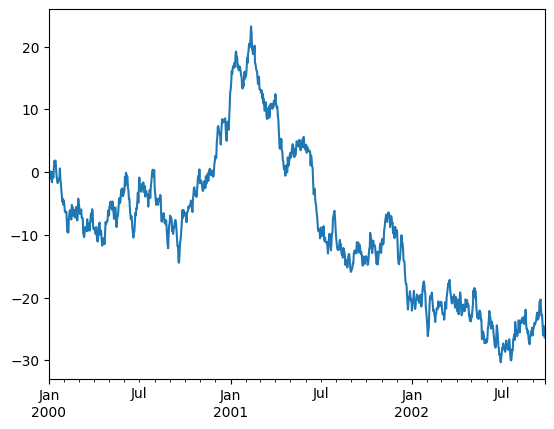

In [86]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 640x480 with 0 Axes>

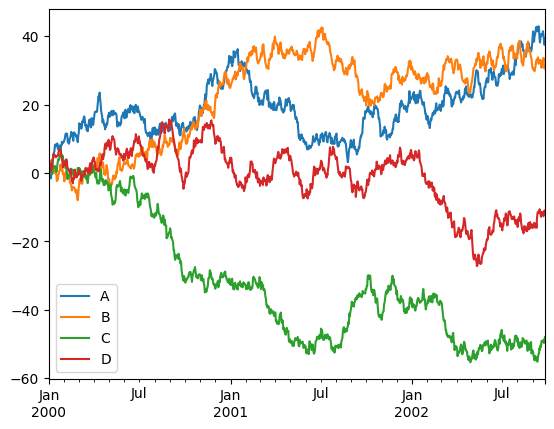

In [87]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')